# Import All Libraries

In [301]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot,plot
from plotly.subplots import make_subplots
from warnings import filterwarnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [302]:
# Disable filter warning
filterwarnings('ignore')

In [303]:
# Read dataframe
data = pd.read_csv('Laptops.csv')
data.head(5)

,Unnamed: 0,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"


# Data Analysis

In [305]:
data.shape

(837, 10)

In [306]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        837 non-null    int64 
 1   Brand             837 non-null    object
 2   Model Name        837 non-null    object
 3   Processor         837 non-null    object
 4   Operating System  837 non-null    object
 5   Storage           825 non-null    object
 6   RAM               837 non-null    object
 7   Screen Size       837 non-null    object
 8   Touch_Screen      837 non-null    object
 9   Price             837 non-null    object
dtypes: int64(1), object(9)
memory usage: 65.5+ KB


In [307]:
# Check duplicated value
data.duplicated().sum()

0

In [308]:
# Check null values
data.isnull().sum()

Unnamed: 0           0
Brand                0
Model Name           0
Processor            0
Operating System     0
Storage             12
RAM                  0
Screen Size          0
Touch_Screen         0
Price                0
dtype: int64

In [309]:
data.describe()

,Unnamed: 0
count,837.000000
mean,418.000000
std,241.765382
min,0.000000
25%,209.000000
50%,418.000000
75%,627.000000
max,836.000000


# Feature Engineering

In [311]:
# Remove unnamed column
data.drop(columns='Unnamed: 0',inplace=True)
data.drop(columns="Model Name",inplace=True)

In [312]:
data.head(2)

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"


In [313]:
# Remove row with null values
data.dropna(inplace=True)
data.shape

(825, 8)

In [314]:
data.head()

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,Apple,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,Apple,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,Apple,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"


## Processor

In [316]:
# Pre Edit Processeur Column
data['Processor'].value_counts()

Processor
Core i5                   361
Core i3                   159
Ryzen 5 Hexa Core          81
Core i7                    68
Ryzen 7 Octa Core          67
Celeron Dual Core          15
Ryzen 3 Quad Core          13
Celeron Quad Core          10
Ryzen 5 Quad Core          10
Ryzen 3 Dual Core           7
Core i9                     4
Pentium Silver              4
M2                          3
Athlon Dual Core            3
M1                          3
Ryzen 9 Octa Core           2
Ryzen 5                     2
M1 Max                      1
Ryzen 5 Dual Core           1
Ryzen 7 Quad Core           1
M1 Pro                      1
M3 Pro                      1
M2 Max                      1
MediaTek MT8788             1
Ryzen Z1 Octa Core          1
MediaTek Kompanio 520       1
MediaTek Kompanio 500       1
Ryzen Z1 HexaCore           1
MediaTek Kompanio 1200      1
Ryzen 9 16 Core             1
Name: count, dtype: int64

In [317]:
# Edit the 'Processor' column by applying a lambda function to each element.
# The lambda function splits each element at whitespaces, takes the first two words, and then joins them back together with a space.
# This effectively retains only the first two words of each element in the 'Processor' column.
data["Processor"] = data['Processor'].apply(lambda x: " ".join(x.split()[0:2]))


In [318]:
# Post Edit Processor Column
data['Processor'].value_counts()

Processor
Core i5              361
Core i3              159
Ryzen 5               94
Core i7               68
Ryzen 7               68
Ryzen 3               20
Celeron Dual          15
Celeron Quad          10
Pentium Silver         4
Core i9                4
Ryzen 9                3
Athlon Dual            3
MediaTek Kompanio      3
M1                     3
M2                     3
Ryzen Z1               2
MediaTek MT8788        1
M1 Max                 1
M2 Max                 1
M3 Pro                 1
M1 Pro                 1
Name: count, dtype: int64

In [319]:
# Define a function named 'processor' that categorizes processor types based on certain keywords in their descriptions.
def processor(text):
    # Check if the text contains 'Celeron', indicating an Intel Celeron processor.
    if "Celeron" in text:
        return "Celeron"
    # Check if the text contains 'Core', indicating an Intel Core processor.
    elif "Core" in text:
        # If the text contains 'Core' and '9', classify it as 'Others'.
        if "9" in text:
            return "Others"
        # Otherwise, return the original text.
        else:
            return text
    # Check if the text contains 'Ryzen', indicating an AMD Ryzen processor.
    elif "Ryzen" in text:
        # If the text contains any of the specified substrings ('Z1' or '9'), classify it as 'Others'.
        if any(m in text for m in ['Z1', "9"]):
            return "Others"
        # Otherwise, return the original text.
        else:
            return text
    # Check if the text contains any of the specified substrings ('M1', 'M2', or 'M3'), indicating an Apple M-series processor.
    elif any(m in text for m in ["M1", "M2", "M3"]):
        return "Mac"
    # If none of the above conditions are met, classify the processor as 'Others'.
    else:
        return "Others"

# Apply the 'processor' function to each element in the 'Processor' column of the DataFrame 'data',
# and assign the result back to the 'Processor' column.
data["Processor"] = data['Processor'].apply(processor)


In [320]:
data.Processor.value_counts()

Processor
Core i5    361
Core i3    159
Ryzen 5     94
Core i7     68
Ryzen 7     68
Celeron     25
Ryzen 3     20
Others      20
Mac         10
Name: count, dtype: int64

In [321]:
data.head(2)

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"


## Operating System

In [323]:
# Pre Edit Operation System Column
data['Operating System'].value_counts()

Operating System
Windows 11 Home    747
Windows 10 Home     27
Chrome              13
Windows 10          10
DOS                  7
Mac OS Monterey      5
Windows 11 Pro       5
Mac OS Big Sur       3
Windows 10 Pro       3
Prime OS             1
Ubuntu               1
macOS Ventura        1
macOS Sonoma         1
Mac OS Mojave        1
Name: count, dtype: int64

In [324]:
# Define a function named 'os' that categorizes operating systems based on certain keywords in their descriptions.
def os(data):
    # Check if the text contains 'windows', indicating a Windows operating system.
    if 'windows' in data.lower():
        return "Windows"
    # Check if the text contains 'mac', indicating a Mac operating system.
    elif 'mac' in data.lower():
        return "Mac"
    # If none of the above conditions are met, classify the operating system as 'Others'.
    else:
        return "Others"

# Apply the 'os' function to each element in the 'Operating System' column of the DataFrame 'data',
# and assign the result back to the 'Operating System' column.
data['Operating System'] = data['Operating System'].apply(os)

In [325]:
# Post Edit Operation System Column
data['Operating System'].value_counts()

Operating System
Windows    792
Others      22
Mac         11
Name: count, dtype: int64

In [326]:
data.head(2)

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,Core i3,Windows,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"


## Storage

In [328]:
# Pre Edit Storage Column
data['Storage'].value_counts()

Storage
512 GB    627
1 TB      101
256 GB     49
2 TB       20
128 GB     12
4 TB       10
64 GB       4
3 TB        1
6 TB        1
Name: count, dtype: int64

In [329]:
# Remove the substring 'GB' from each element in the 'Storage' column by replacing it with an empty string.
data['Storage'] = data['Storage'].str.replace("GB", "")

# Replace the substring 'TB' with '000' in each element in the 'Storage' column, effectively converting terabytes to gigabytes.
data['Storage'] = data['Storage'].str.replace("TB", "000")

# Remove any remaining whitespace characters from each element in the 'Storage' column.
data['Storage'] = data['Storage'].str.replace(" ", "")


In [330]:
# Post Edit Storage Column
data['Storage'].value_counts()

Storage
512     627
1000    101
256      49
2000     20
128      12
4000     10
64        4
3000      1
6000      1
Name: count, dtype: int64

In [331]:
data.head(2)

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows,512,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,HP,Core i3,Windows,512,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"


# RAM

In [333]:
# Pre Edit Ram Column
data['RAM'].value_counts()

RAM
8 GB     414
16 GB    373
4 GB      24
32 GB      9
12 GB      2
64 GB      2
18 GB      1
Name: count, dtype: int64

In [334]:
# Remove the substring 'GB' from each element in the 'RAM' column by replacing it with an empty string.
data['RAM'] = data['RAM'].str.replace("GB", "")

In [335]:
# Post Edit Ram Column
data['RAM'].value_counts()

RAM
8      414
16     373
4       24
32       9
12       2
64       2
18       1
Name: count, dtype: int64

# Screen Size

In [337]:
# Pre Edit Screen Size Column
data['Screen Size'].value_counts()

Screen Size
39.62 cm (15.6 Inch)     363
39.62 cm (15.6 inch)     184
35.56 cm (14 inch)       124
35.56 cm (14 Inch)        49
40.64 cm (16 Inch)        19
33.78 cm (13.3 inch)      10
40.64 cm (16 inch)         8
40.89 cm (16.1 Inch)       7
43.94 cm (17.3 Inch)       6
33.78 cm (13.3 Inch)       6
96.52 cm (38 cm)           6
38.1 cm (15 inch)          4
35.81 cm (14.1 inch)       3
40.89 cm (16.1 inch)       3
39.01 cm (15.36 inch)      3
34.29 cm (13.5 inch)       3
35.81 cm (14.1 Inch)       2
33.02 cm (13 inch)         2
100.63 cm (39.62 cm)       2
17.78 cm (7 Inch)          2
43.94 cm (17.3 inch)       2
34.29 cm (13.5 Inch)       2
38.86 cm (15.3 Inch)       1
31.5 cm (12.4 Inch)        1
36.07 cm (14.2 inch)       1
38.0 cm (14.96 cm)         1
90.32 cm (35.56 cm)        1
30.48 cm (12 inch)         1
29.46 cm (11.6 Inch)       1
41.15 cm (16.2 inch)       1
34.04 cm (13.4 inch)       1
35.0 cm (13.78 inch)       1
34.04 cm (13.4 Inch)       1
26.67 cm (10.5 inch)       1
38

In [338]:
# Edit the 'Screen Size' column by applying a lambda function to each element.
# The lambda function splits each element at whitespaces, takes the first part of the split result, and then joins it back together.
# This effectively retains only the numerical portion of each element in the 'Screen Size' column, removing any additional text.
data['Screen Size'] = data['Screen Size'].apply(lambda x: "".join(x.split(" ")[0]))


In [339]:
# Post Edit Screen Size Column
data['Screen Size'].value_counts()

Screen Size
39.62     547
35.56     173
40.64      27
33.78      16
40.89      10
43.94       8
96.52       6
35.81       5
34.29       5
38.1        4
39.01       3
17.78       2
33.02       2
34.04       2
29.46       2
38.0        2
100.63      2
26.67       1
34.54       1
35.0        1
41.15       1
90.32       1
30.48       1
38.86       1
36.07       1
31.5        1
Name: count, dtype: int64

# Price

In [341]:
# Pre Edit Price Column
data['Price'].value_counts()

Price
₹53,990      65
₹37,990      42
₹54,990      41
₹49,990      40
₹38,990      38
             ..
₹52,890       1
₹1,47,743     1
₹64,600       1
₹1,99,990     1
₹70,500       1
Name: count, Length: 269, dtype: int64

In [342]:
# Remove the Indian Rupee symbol '₹' from each element in the 'Price' column by replacing it with an empty string.
data.Price = data.Price.str.replace("₹", "")

# Remove commas from each element in the 'Price' column to make them convertible to numerical values.
data.Price = data.Price.str.replace(",", "")


In [343]:
# Post Edit Price Column
data['Price'].value_counts()

Price
53990     65
37990     42
54990     41
49990     40
38990     38
          ..
52890      1
147743     1
64600      1
199990     1
70500      1
Name: count, Length: 269, dtype: int64

# Final Dataframe

In [345]:
data.head()

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows,512,8,39.62,No,38990
1,HP,Core i3,Windows,512,8,39.62,No,37990
2,Apple,Mac,Mac,256,8,33.78,No,70990
3,Apple,Mac,Mac,256,8,33.78,No,70990
4,Apple,Mac,Mac,256,8,33.78,No,70990


# DATA VISUALISATION

First we need to start with some basic visualization like distribution of different characteristics

## BRAND DISTRIBUTION

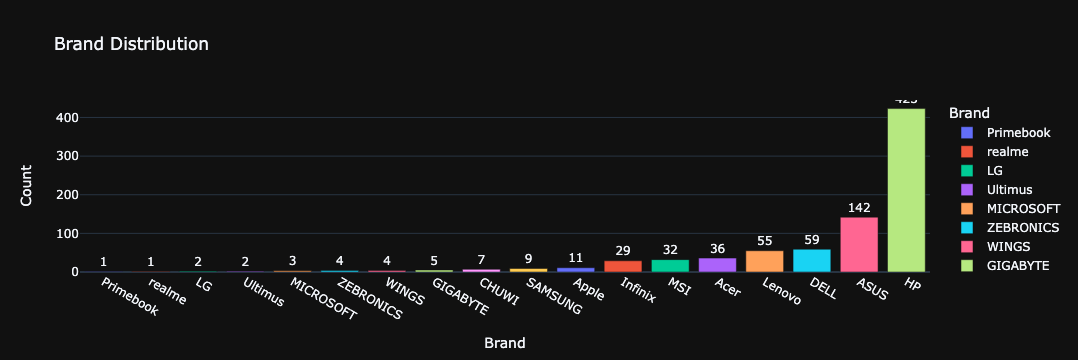

In [349]:
# Calculate the count of each unique value in the 'Brand' column and sort them in ascending order.
data_brand = data['Brand'].value_counts().sort_values(ascending=True)

# Create a bar plot using Plotly Express (px) with the count of each brand.
# Customize the labels, template, text display, color, and title of the plot.
fig = px.bar(data_brand,
             labels={'value': 'Count'},  # Customize the label for the y-axis.
             template='plotly_dark',    # Use a dark template for the plot.
             text_auto=True,            # Automatically position the text labels.
             color=data_brand.index,    # Color bars based on the brand.
             title='Brand Distribution' # Set the title of the plot.
            )

# Update the position of the text labels to be outside the bars for better visibility.
fig.update_traces(textposition='outside')

# Display the plot.
fig.show()


## PROCESSOR

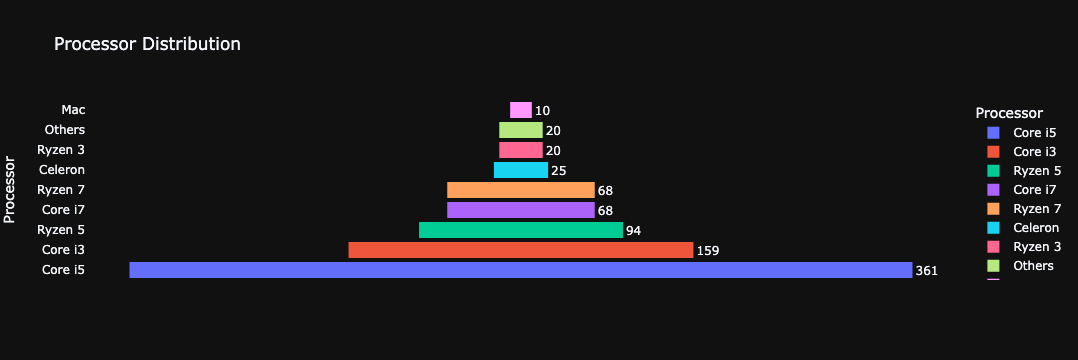

In [351]:
# Calculate the count of each unique value in the 'Processor' column.
data_processor = data['Processor'].value_counts()

# Create a funnel plot using Plotly Express (px) to visualize the distribution of processors.
# Customize the title, template, color, and labels of the plot.
fig = px.funnel(data_processor,
                title='Processor Distribution',  # Set the title of the plot.
                template='plotly_dark',          # Use a dark template for the plot.
                color=data_processor.index,      # Color segments based on the processor.
                labels={'value': 'Count'},       # Customize the label for the value.
                )

# Update the position of the text labels to be outside the segments for better visibility.
fig.update_traces(textposition='outside')

# Display the plot.
fig.show()


In [352]:
data.head(2)

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,HP,Core i3,Windows,512,8,39.62,No,38990
1,HP,Core i3,Windows,512,8,39.62,No,37990


## PROCESSOR MANUFACTURER

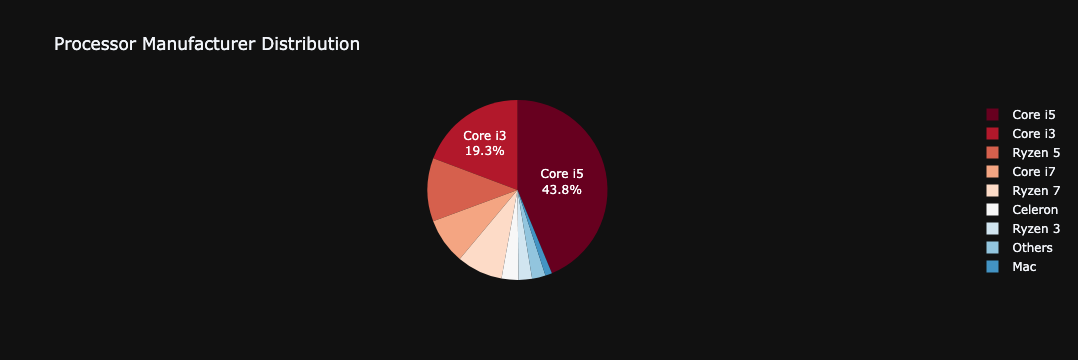

In [354]:
# Calculate the count of each unique value in the 'Processor Manufacturer' column.
data_processor_manufacturer = data['Processor'].value_counts()

# Create a pie chart using Plotly Express (px) to visualize the distribution of processor manufacturers.
# Customize the values, names, title, colors, and template of the pie chart.
fig = px.pie(values=data_processor_manufacturer,                # Provide the values for each slice of the pie.
             names=data_processor_manufacturer.index,           # Provide the names for each slice.
             title='Processor Manufacturer Distribution',       # Set the title of the pie chart.
             color_discrete_sequence=px.colors.sequential.RdBu, # Define the color sequence for slices.
             template='plotly_dark'                             # Use a dark template for the plot.
            )

# Update the text information displayed on each slice to include the label and percentage.
fig.update_traces(textinfo='label+percent')

# Update the position of the text labels to be inside each slice for better readability.
fig.update_traces(textposition='inside')

# Set a uniform minimum font size for text labels on the plot and hide text that does not fit within the slices.
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# Display the pie chart.
fig.show()



<Axes: xlabel='Processor'>

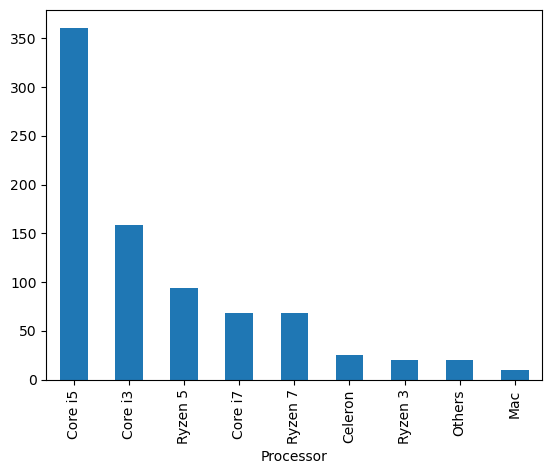

In [355]:
data['Processor'].value_counts().plot(kind = 'bar')

## STORAGE

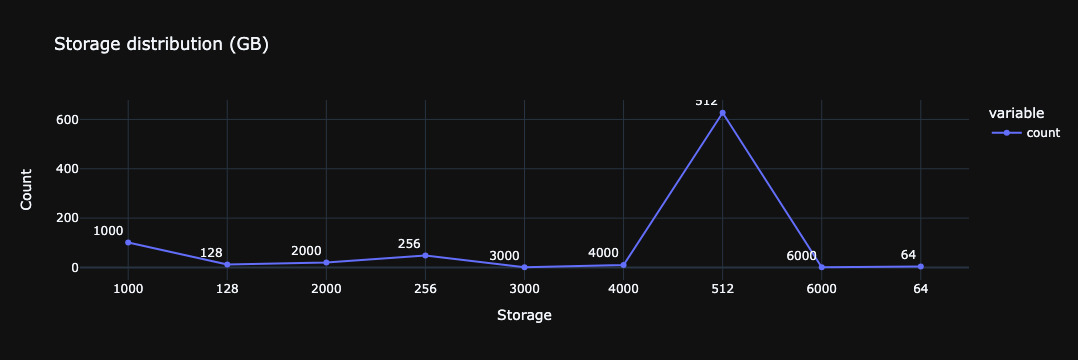

In [357]:
# Calculate the count of each unique value in the 'Storage' column and sort them by index in ascending order.
data_storage = data['Storage'].value_counts().sort_index(ascending=True)

# Create a line plot using Plotly Express (px) to visualize the distribution of storage capacities.
# Customize the labels, template, markers, title, and text display of the plot.
fig = px.line(data_storage,
              labels={'value': 'Count'},        # Customize the label for the y-axis.
              template='plotly_dark',          # Use a dark template for the plot.
              markers=True,                    # Display markers at data points on the line.
              title='Storage distribution (GB)', # Set the title of the plot.
              text=data_storage.index         # Display text labels at each data point.
             )

# Update the position of the text labels to be at the top left of each data point.
fig.update_traces(textposition="top left")

# Set a uniform minimum font size for text labels on the plot.
fig.update_layout(uniformtext_minsize=20)

# Display the line plot.
fig.show()


## RAM

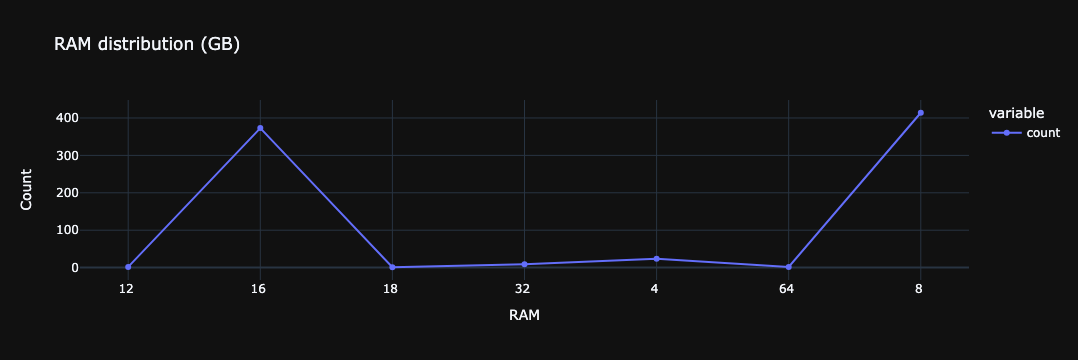

In [359]:
# Calculate the count of each unique value in the 'RAM' column and sort them by index.
data_ram = data['RAM'].value_counts().sort_index()

# Create a line plot using Plotly Express (px) to visualize the distribution of RAM capacities.
# Customize the labels, template, markers, and title of the plot.
fig = px.line(data_ram,
              labels={'value': 'Count'},       # Customize the label for the y-axis.
              template='plotly_dark',         # Use a dark template for the plot.
              markers=True,                   # Display markers at data points on the line.
              title='RAM distribution (GB)'  # Set the title of the plot.
             )

# Update the position of the text labels to be at the top left of each data point.
fig.update_traces(textposition="top left")

# Set a uniform minimum font size for text labels on the plot.
fig.update_layout(uniformtext_minsize=20)

# Display the line plot.
fig.show()


## TOUCH SCREEN

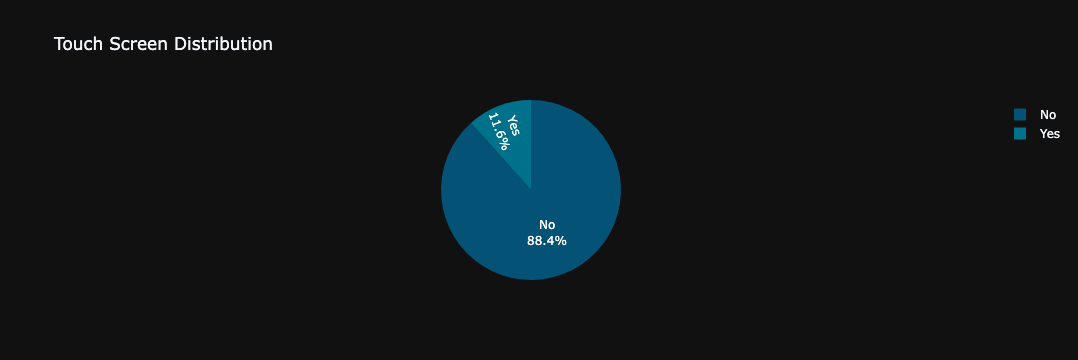

In [361]:
# Calculate the count of each unique value in the 'Touch_Screen' column.
data_touch_screen = data['Touch_Screen'].value_counts()

# Create a pie chart using Plotly Express (px) to visualize the distribution of touch screen presence.
# Customize the values, names, title, colors, and template of the pie chart.
fig = px.pie(values=data_touch_screen,                      # Provide the values for each slice of the pie.
             names=data_touch_screen.index,                 # Provide the names for each slice.
             title='Touch Screen Distribution',            # Set the title of the pie chart.
             color_discrete_sequence=px.colors.sequential.Bluyl_r,  # Define the color sequence for slices.
             template='plotly_dark'                        # Use a dark template for the plot.
            )

# Update the text information displayed on each slice to include the label and percentage.
fig.update_traces(textinfo='label+percent')

# Update the position of the text labels to be inside each slice for better readability.
fig.update_traces(textposition='inside')

# Set a uniform minimum font size for text labels on the plot and hide text that does not fit within the slices.
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# Display the pie chart.
fig.show()


In [362]:
data['Brand'].value_counts()

Brand
HP           423
ASUS         142
DELL          59
Lenovo        55
Acer          36
MSI           32
Infinix       29
Apple         11
SAMSUNG        9
CHUWI          7
GIGABYTE       5
WINGS          4
ZEBRONICS      4
MICROSOFT      3
Ultimus        2
LG             2
realme         1
Primebook      1
Name: count, dtype: int64

In [363]:
# Define a list of rare or less common brands that we want to classify as 'Others'.
rare_b = ['SAMSUNG', 'GIGABYTE', 'CHUWI', 'WINGS', 'ZEBRONICS', 'Ultimus', 'LG', 'realme', 'Primebook', 'MICROSOFT']

# Update the 'Brand' column by applying a lambda function to each element.
# The lambda function checks if the brand name is in the list of rare brands.
# If it is, the brand name is replaced with 'Others', otherwise it remains unchanged.
data.Brand = data.Brand.apply(lambda x: "Others" if x in rare_b else x)


<Axes: xlabel='Brand'>

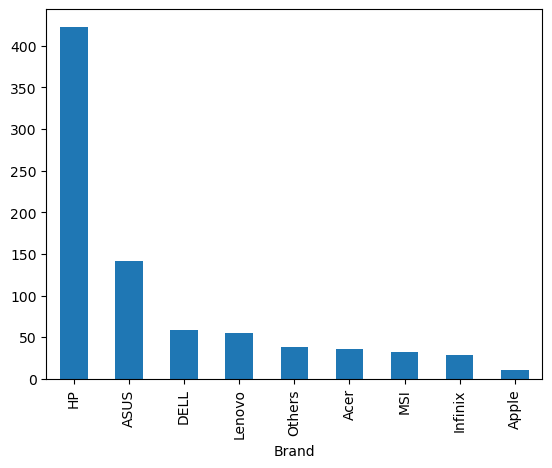

In [364]:
data['Brand'].value_counts().plot(kind = 'bar')

In [365]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [366]:
X= data.drop('Price',axis=1)
y=data['Price']
X.head()

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen
0,HP,Core i3,Windows,512,8,39.62,No
1,HP,Core i3,Windows,512,8,39.62,No
2,Apple,Mac,Mac,256,8,33.78,No
3,Apple,Mac,Mac,256,8,33.78,No
4,Apple,Mac,Mac,256,8,33.78,No


In [367]:
# Preprocess categorical variables with one-hot encoding
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Extracting unique categories across train and test set
all_categories = {}
for feature in categorical_features:
    all_categories[feature] = list(set(X_train[feature]).union(set(X_test[feature])))

# Create OneHotEncoder with explicit categories
encoder = OneHotEncoder(categories=[all_categories[feature] for feature in categorical_features])
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_features)], remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [368]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=83)

### Linear Regression()

In [370]:
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_encoded, y_train)

# Predict on test set
linear_reg_pred = linear_reg.predict(X_test_encoded)

# Evaluate model
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 21734.969993551178


### Polynomial Regression